# Analysis of players

This notebook contains analyses of players that participated at the **`Copa America 2021`**. The analyses included are: `GK actions outside de area`, `Progressive and creative loads`, and `Dribbles`. Inspiration is taken from [@NinadB_06](https://twitter.com/NinadB_06) and [@exceedingxpuns](https://twitter.com/exceedingxpuns).

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects
import seaborn as sns

from highlight_text import htext
from PIL import Image

In [2]:
pd.set_option('display.max_columns', 100)

## Set constants

In [3]:
countries = ['argentina', 'bolivia', 'brazil', 'colombia', 'chile', 'ecuador', 'paraguay', 'peru', 
             'uruguay', 'venezuela']

## 1. Analysis: *Dribbles*

The dribble analysis is inspired in [@NinadB_06](https://twitter.com/NinadB_06) who published his analysis [here](https://twitter.com/NinadB_06/status/1473044547345293314). It involves data about `dribbles` and `metgs`.

### Load data

In [4]:
dribble_df = pd.DataFrame()
for country in countries:
    if dribble_df.size > 0:
        aux_dribble_df = pd.read_csv(f"data/{country}_possession.csv")
        aux_dribble_df['country'] = country
        dribble_df = dribble_df.append(aux_dribble_df, ignore_index=True, sort=False)
    else:
        dribble_df = pd.read_csv(f"data/{country}_possession.csv")
        dribble_df['country'] = country        

### Check data

In [5]:
print(f"The dataset contains {dribble_df.shape[0]} rows and {dribble_df.shape[1]} columns")

The dataset contains 253 rows and 30 columns


In [6]:
dribble_df.head()

,player,pos,age,90s,touches_touches,touches_def pen,touches_def 3rd,touches_mid 3rd,touches_att 3rd,touches_att pen,touches_live,dribbles_succ,dribbles_att,dribbles_succ%,dribbles_#pl,dribbles_megs,carries_carries,carries_totdist,carries_prgdist,carries_prog,carries_1/3,carries_cpa,carries_mis,carries_dis,receiving_targ,receiving_rec,receiving_rec%,receiving_prog,matches,country
0,Lionel Messi,"FW,MF",33.0,7.3,432,1,27,193,254,36,389,33,47,70.2,36,0,354,2085,1306,71,25,12,13,27,378,321,84.9,32,Matches,argentina
1,Emiliano Martínez,GK,28.0,6.3,171,156,171,0,0,0,122,0,0,NaN,0,0,92,477,290,0,0,0,0,0,68,68,100.0,0,Matches,argentina
2,Rodrigo De Paul,MF,26.0,5.5,305,3,75,140,119,7,281,3,10,30.0,5,0,224,1265,670,29,10,1,3,7,226,202,89.4,13,Matches,argentina
3,Nicolás Otamendi,DF,32.0,5.3,258,43,144,130,6,3,242,0,0,NaN,0,0,150,1158,777,16,2,0,1,0,164,163,99.4,1,Matches,argentina
4,Lautaro Martínez,FW,23.0,4.9,129,7,18,54,61,20,123,8,9,88.9,9,1,76,185,85,3,0,1,10,11,135,75,55.6,19,Matches,argentina


### Filter data

Remove goalkeepers

In [7]:
dribble_df = dribble_df[dribble_df['pos'] != 'GK']

In [8]:
print(f"After removing GKs the dataset contains {dribble_df.shape[0]} players")

After removing GKs the dataset contains 236 players


Remove players who play less than 50% of the team's played minutes

In [9]:
total_min_team_played = dribble_df.loc[dribble_df['player']=='Squad Total','90s'].values[0]
dribble_df = dribble_df[dribble_df['90s'] >= (total_min_team_played/2)]

Remove summary rows

In [10]:
dribble_df = dribble_df[dribble_df['player']!='Squad Total']

In [11]:
dribble_df = dribble_df[dribble_df['player']!='Opponent Total']

Select players that attempted to dribble more than the mean

In [12]:
mean_dribbling = dribble_df['dribbles_att'].mean()
dribble_df = dribble_df[dribble_df['dribbles_att'] > mean_dribbling]

In [13]:
print(f"There are {dribble_df.shape[0]} players who dribble more than the mean {round(mean_dribbling,2)}")

There are 22 players who dribble more than the mean 9.01


Select columns

In [14]:
dribble_df = dribble_df[['player','pos', 'country', 'dribbles_att', 'dribbles_succ', 'dribbles_succ%', 'dribbles_megs']]

In [15]:
dribble_df.head()

,player,pos,country,dribbles_att,dribbles_succ,dribbles_succ%,dribbles_megs
0,Lionel Messi,"FW,MF",argentina,47,33,70.2,0
2,Rodrigo De Paul,MF,argentina,10,3,30.0,0
56,Neymar,FW,brazil,59,30,50.8,7
57,Fred,MF,brazil,11,6,54.5,2
59,Richarlison,"FW,MF",brazil,11,10,90.9,0


In [16]:
dribble_df['dribbles_megs'].describe()

count    22.000000
mean      0.909091
std       1.630340
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       7.000000
Name: dribbles_megs, dtype: float64

In [17]:
dribble_df['dribbles_att'].describe()

count    22.000000
mean     19.954545
std      13.695593
min      10.000000
25%      11.000000
50%      14.000000
75%      24.500000
max      59.000000
Name: dribbles_att, dtype: float64

In [18]:
dribble_df['dribbles_succ'].describe()

count    22.000000
mean     11.909091
std       8.462292
min       3.000000
25%       6.000000
50%       9.000000
75%      15.000000
max      33.000000
Name: dribbles_succ, dtype: float64

### Draw scatterplots

/var/folders/kr/kf9llw3x04sg34ns7_9hgt4m0000gn/T/ipykernel_30288/2852756408.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


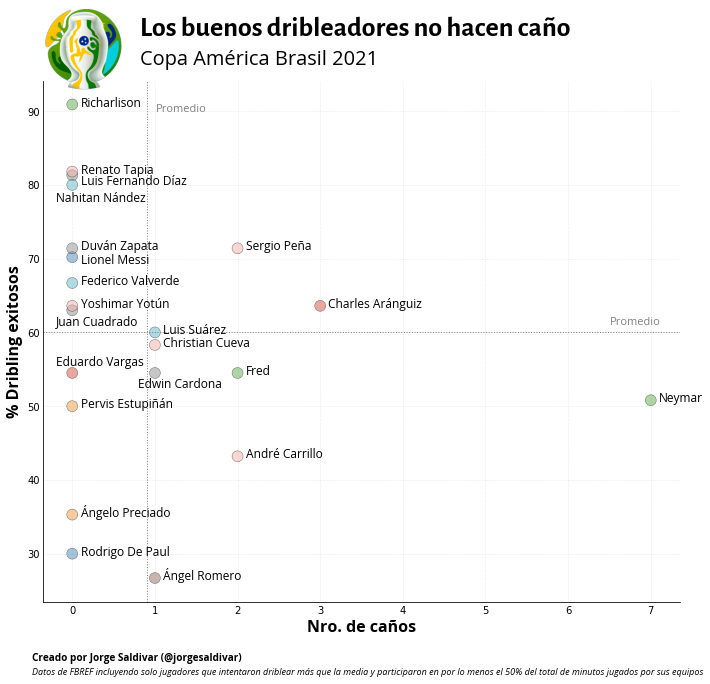

In [19]:
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "black"
background = "white"
filler = "grey"
primary = "blue"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)

x = dribble_df['dribbles_megs'].values
y = dribble_df['dribbles_succ%'].values

colors = {'argentina':'#4A8ABD', 'bolivia':'#C8C656', 'brazil':'#61AA4F', 'colombia':'#919191' , 
          'chile':'#D25041', 'ecuador': '#F49845', 'paraguay': '#976C60', 'peru': '#F3B0AB', 'uruguay': '#60B9C7',
          'venezuela': '#9F81C5'}

ax.scatter(x, y, s=120, color=dribble_df['country'].map(colors), edgecolors='black', alpha=0.5, lw=0.5, zorder=2)
# add horizontal lines
ax.axhline(y=dribble_df['dribbles_succ%'].describe()['mean'], color='gray', linestyle='dotted', lw=1)
# add vertical lines
ax.axvline(x=dribble_df['dribbles_megs'].describe()['mean'], color='gray', linestyle='dotted', lw=1)

fig.text(0.2,1.06,"Los buenos dribleadores no hacen caño",fontweight="bold", fontsize=28,fontfamily=title_font, color=text_color)
fig.text(0.2,1.01,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, color=text_color)

ax.set_xlabel("Nro. de caños", fontfamily=body_font, fontweight="bold", fontsize=16, color=text_color)
ax.set_ylabel("% Dribling exitosos", fontfamily=body_font, fontweight="bold", fontsize= 16, color=text_color)

ax.tick_params(axis="both",length=0)


spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

# add annotations
ax.annotate('Promedio', (6.5, dribble_df['dribbles_succ%'].describe()['mean']+1), fontfamily=body_font, 
            fontweight="regular", fontsize=11, color='gray')
ax.annotate('Promedio', (dribble_df['dribbles_megs'].describe()['mean']+0.1, 90), fontfamily=body_font, 
            fontweight="regular", fontsize=11, color='gray')
for i, txt in enumerate(dribble_df['player']):
    delta_x, delta_y = 0.1, -0.2
    if txt == 'Eduardo Vargas':
        delta_y = 1
        delta_x = -0.2
    if txt == 'Edwin Cardona':
        delta_y = -1.9
        delta_x = -0.2
    if txt == 'Juan Cuadrado':
        delta_y = -1.9
        delta_x = -0.2
    if txt == 'Nahitan Nández':
        delta_y = -2.2
        delta_x = -0.2
    if txt == 'Luis Fernando Díaz':
        delta_y = -1.3
    if txt == 'Lionel Messi':
        delta_y = -0.8
    ax.annotate(txt, (x[i]+delta_x, y[i]+delta_y), fontfamily=body_font, fontweight="regular", fontsize=12, color=text_color)            

ax2 = fig.add_axes([0.02,0.96,0.20,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)
        
        
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.025, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF incluyendo solo jugadores que intentaron driblear más que la media y participaron en por lo menos el 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.05, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.savefig("outputs/dribbling.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()

## 2. Analysis: *GK actions outside de area*

This analysis is inspired in [@NinadB_06](https://twitter.com/NinadB_06) who published his analysis [here](https://twitter.com/NinadB_06/status/1470671496628604934). It includes the number of defensive actions outside the penalty area.

### Load data

In [20]:
gk_df = pd.DataFrame()
for country in countries:
    if gk_df.size > 0:
        aux_gk_df = pd.read_csv(f"data/{country}_advance_goalkeeping.csv")
        aux_gk_df['country'] = country
        gk_df = gk_df.append(aux_gk_df, ignore_index=True, sort=False)
    else:
        gk_df = pd.read_csv(f"data/{country}_advance_goalkeeping.csv")
        gk_df['country'] = country        

### Check data

In [21]:
print(f"The dataset contains {gk_df.shape[0]} rows and {gk_df.shape[1]} columns")

The dataset contains 37 rows and 31 columns


In [22]:
gk_df.head()

,player,pos,age,90s,goals_ga,goals_pka,goals_fk,goals_ck,goals_og,expected_psxg,expected_psxg/sot,expected_psxg+/-,expected_/90,launched_cmp,launched_att,launched_cmp%,passes_att,passes_thr,passes_launch%,passes_avglen,goalkicks_att,goalkicks_launch%,goalkicks_avglen,crosses_opp,crosses_stp,crosses_stp%,sweeper_#opa,sweeper_#opa/90,sweeper_avgdist,matches,country
0,Emiliano Martínez,GK,28.0,6.3,2,0,0,0,0,2.6,0.12,0.6,0.09,35,84,41.7,127,27,45.7,40.5,36,72.2,52.9,41,8,19.5,2,0.32,12.3,Matches,argentina
1,Franco Armani,GK,34.0,1.0,1,0,0,0,0,0.8,0.42,-0.2,-0.16,3,8,37.5,22,2,36.4,33.5,1,0.0,13.0,4,0,0.0,0,0.00,8.7,Matches,argentina
2,Squad Total,NaN,27.7,7.3,3,0,0,0,0,3.4,0.16,0.4,0.06,38,92,41.3,149,29,44.3,39.4,37,70.3,51.9,45,8,17.8,2,0.27,11.9,NaN,argentina
3,Opponent Total,NaN,27.7,7.3,12,1,2,1,0,13.3,0.34,1.3,0.17,24,77,31.2,155,28,38.1,37.0,39,46.2,41.8,36,0,0.0,3,0.41,13.0,NaN,argentina
4,Carlos Lampe,GK,33.0,3.0,7,1,0,0,1,11.6,0.36,5.6,1.85,17,42,40.5,88,22,36.4,33.6,30,33.3,31.9,32,1,3.1,0,0.00,12.4,Matches,bolivia


### Filter data

Remove summary rows

In [23]:
gk_df = gk_df[gk_df['player']!='Squad Total']

In [24]:
gk_df = gk_df[gk_df['player']!='Opponent Total']

Remove GK who didn't play

In [25]:
gk_df = gk_df[gk_df['90s'] > 0]

In [26]:
print(f"There are {gk_df.shape[0]} goalkeepers who played during the Copa America")

There are 17 goalkeepers who played during the Copa America


Remove GK with 0 defensive actions outside the penalty area

In [27]:
gk_df = gk_df[gk_df['sweeper_#opa/90'] > 0]

### Order data

In [28]:
gk_df = gk_df.sort_values('sweeper_#opa/90', ascending=True)

In [29]:
gk_df[['player', 'country', '90s', 'sweeper_#opa/90']].head()

,player,country,90s,sweeper_#opa/90
0,Emiliano Martínez,argentina,6.3,0.32
33,Wuilker Faríñez,venezuela,3.0,0.33
27,Pedro Gallese,peru,7.3,0.41
13,David Ospina,colombia,6.3,0.47
9,Alisson,brazil,2.0,0.50


### Add column with player name plus country

In [30]:
gk_df['player_country'] = gk_df['player'] + " (" + gk_df['country'].str.title() + ")"

In [31]:
gk_df[['player_country', '90s', 'sweeper_#opa/90']].head()

,player_country,90s,sweeper_#opa/90
0,Emiliano Martínez (Argentina),6.3,0.32
33,Wuilker Faríñez (Venezuela),3.0,0.33
27,Pedro Gallese (Peru),7.3,0.41
13,David Ospina (Colombia),6.3,0.47
9,Alisson (Brazil),2.0,0.50


### Draw figure

/Users/jorgesaldivar/.pyenv/versions/3.8.0/envs/copa-america-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/kr/kf9llw3x04sg34ns7_9hgt4m0000gn/T/ipykernel_30288/3461190718.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


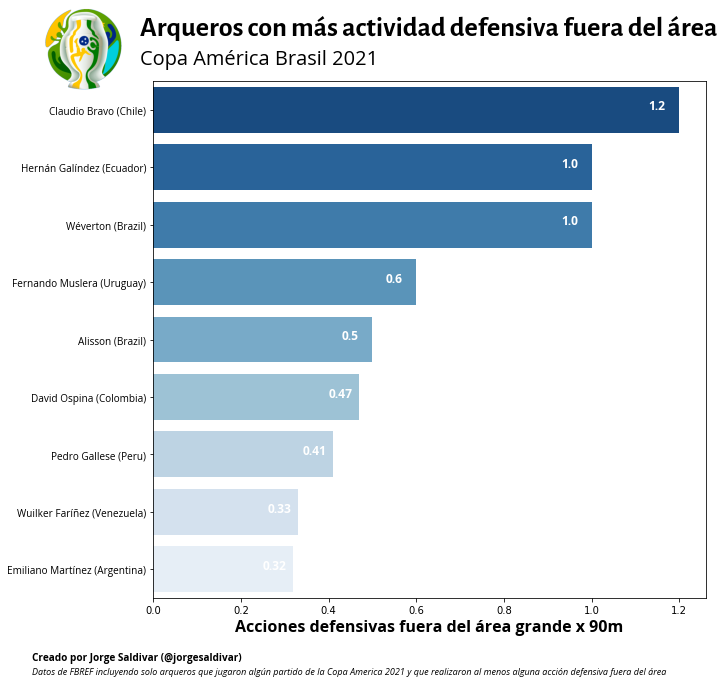

In [32]:
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "black"
background = "white"
filler = "grey"
primary = "blue"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

y_pos = np.arange(gk_df.shape[0])
sns.barplot(gk_df['sweeper_#opa/90'].values, y_pos, palette='Blues', orient="h")
ax.set_yticks(y_pos, labels=gk_df['player_country'].values, fontfamily=body_font)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Acciones defensivas fuera del área grande x 90m", fontfamily=body_font, fontweight="bold", fontsize=16, 
              color=text_color)

fig.text(0.2,1.06,"Arqueros con más actividad defensiva fuera del área",fontweight="bold", fontsize=28,fontfamily=title_font, color=text_color)
fig.text(0.2,1.01,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, color=text_color)


for i, v in enumerate(gk_df['sweeper_#opa/90'].values):
    ax.text(v-0.07, i, str(v), color="white", fontweight='bold', fontfamily=body_font, fontsize=12)

ax2 = fig.add_axes([0.02,0.96,0.20,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)
        
        
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.025, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF incluyendo solo arqueros que jugaron algún partido de la Copa America 2021 y que realizaron al menos alguna acción defensiva fuera del área"
fig.text(0.05, -0.05, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.savefig("outputs/gk_opa.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()

## 3. Analysis: *Progressive and creative loads*

This analysis is inspired in [@exceedingxpuns](https://twitter.com/exceedingxpuns) who published his analysis [here](https://twitter.com/exceedingxpuns/status/1467819011169685505). It includes the `usage rate` of `progressive passes` plus `progressive carries`, and the `usage rate` of `shot-creating actions`. More about usage rates [here](https://statsbomb.com/2014/09/usage-rates-a-primer)

### Load data

Load `passing` dataset

In [33]:
passing_df = pd.DataFrame()
for country in countries:
    if passing_df.size > 0:
        aux_passing_df = pd.read_csv(f"data/{country}_passing.csv")
        aux_passing_df['country'] = country
        passing_df = passing_df.append(aux_passing_df, ignore_index=True, sort=False)
    else:
        passing_df = pd.read_csv(f"data/{country}_passing.csv")
        passing_df['country'] = country

Load `possession` dataset

In [34]:
possession_df = pd.DataFrame()
for country in countries:
    if possession_df.size > 0:
        aux_possession_df = pd.read_csv(f"data/{country}_possession.csv")
        aux_possession_df['country'] = country
        possession_df = possession_df.append(aux_possession_df, ignore_index=True, sort=False)
    else:
        possession_df = pd.read_csv(f"data/{country}_possession.csv")
        possession_df['country'] = country

Load `goal and shot creation` dataset

In [35]:
gsc_df = pd.DataFrame()
for country in countries:
    if possession_df.size > 0:
        aux_gsc_df = pd.read_csv(f"data/{country}_goal_and_shot_creation.csv")
        aux_gsc_df['country'] = country
        gsc_df = gsc_df.append(aux_gsc_df, ignore_index=True, sort=False)
    else:
        gsc_df = pd.read_csv(f"data/{country}_goal_and_shot_creation.csv")
        gsc_df['country'] = country

### Check datasets

**Passing**

In [36]:
passing_df.head()

,player,pos,age,90s,total_cmp,total_att,total_cmp%,total_totdist,total_prgdist,short_cmp,short_att,short_cmp%,medium_cmp,medium_att,medium_cmp%,long_cmp,long_att,long_cmp%,ast,xa,a-xa,kp,1/3,ppa,crspa,prog,matches,country
0,Lionel Messi,"FW,MF",33.0,7.3,249,323,77.1,4417,1525,117,139,84.2,88,107,82.2,33,51,64.7,5,2.9,2.1,22,31,11,1,42,Matches,argentina
1,Emiliano Martínez,GK,28.0,6.3,111,163,68.1,3741,2449,15,15,100.0,54,55,98.2,41,91,45.1,0,0.0,0.0,0,5,0,0,0,Matches,argentina
2,Rodrigo De Paul,MF,26.0,5.5,211,247,85.4,4157,999,87,100,87.0,83,93,89.2,34,44,77.3,1,0.8,0.2,8,18,5,0,22,Matches,argentina
3,Nicolás Otamendi,DF,32.0,5.3,175,199,87.9,3621,1098,53,61,86.9,96,105,91.4,26,31,83.9,0,0.0,0.0,1,13,0,0,9,Matches,argentina
4,Lautaro Martínez,FW,23.0,4.9,41,57,71.9,555,22,25,27,92.6,12,19,63.2,2,6,33.3,0,0.0,0.0,1,2,0,0,0,Matches,argentina


In [37]:
passing_df.shape

(253, 28)

**Possession**

In [38]:
possession_df.head()

,player,pos,age,90s,touches_touches,touches_def pen,touches_def 3rd,touches_mid 3rd,touches_att 3rd,touches_att pen,touches_live,dribbles_succ,dribbles_att,dribbles_succ%,dribbles_#pl,dribbles_megs,carries_carries,carries_totdist,carries_prgdist,carries_prog,carries_1/3,carries_cpa,carries_mis,carries_dis,receiving_targ,receiving_rec,receiving_rec%,receiving_prog,matches,country
0,Lionel Messi,"FW,MF",33.0,7.3,432,1,27,193,254,36,389,33,47,70.2,36,0,354,2085,1306,71,25,12,13,27,378,321,84.9,32,Matches,argentina
1,Emiliano Martínez,GK,28.0,6.3,171,156,171,0,0,0,122,0,0,NaN,0,0,92,477,290,0,0,0,0,0,68,68,100.0,0,Matches,argentina
2,Rodrigo De Paul,MF,26.0,5.5,305,3,75,140,119,7,281,3,10,30.0,5,0,224,1265,670,29,10,1,3,7,226,202,89.4,13,Matches,argentina
3,Nicolás Otamendi,DF,32.0,5.3,258,43,144,130,6,3,242,0,0,NaN,0,0,150,1158,777,16,2,0,1,0,164,163,99.4,1,Matches,argentina
4,Lautaro Martínez,FW,23.0,4.9,129,7,18,54,61,20,123,8,9,88.9,9,1,76,185,85,3,0,1,10,11,135,75,55.6,19,Matches,argentina


In [39]:
possession_df.shape

(253, 30)

**Goal and shot creation**

In [40]:
gsc_df.head()

,player,pos,age,90s,sca_sca,sca_sca90,scatypes_passlive,scatypes_passdead,scatypes_drib,scatypes_sh,scatypes_fld,scatypes_def,gca_gca,gca_gca90,gcatypes_passlive,gcatypes_passdead,gcatypes_drib,gcatypes_sh,gcatypes_fld,gcatypes_def,matches,country
0,Lionel Messi,"FW,MF",33.0,7.3,46,6.27,23,7,4,7,4,1,8,1.09,8,0,0,0,0,0,Matches,argentina
1,Emiliano Martínez,GK,28.0,6.3,0,0.00,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,Matches,argentina
2,Rodrigo De Paul,MF,26.0,5.5,15,2.71,11,3,0,0,1,0,2,0.36,1,1,0,0,0,0,Matches,argentina
3,Nicolás Otamendi,DF,32.0,5.3,3,0.56,1,1,0,0,1,0,1,0.19,1,0,0,0,0,0,Matches,argentina
4,Lautaro Martínez,FW,23.0,4.9,7,1.42,3,0,1,3,0,0,0,0.00,0,0,0,0,0,0,Matches,argentina


In [41]:
gsc_df.shape

(253, 22)

### Process datasets

In [42]:
passing_df = passing_df[passing_df['player'] != 'Opponent Total']

In [43]:
possession_df = possession_df[possession_df['player'] != 'Opponent Total']

In [44]:
gsc_df = gsc_df[gsc_df['player']!='Opponent Total']

### Create dataset for analysis

In [45]:
analysis_df = pd.merge(passing_df[['player','country', 'pos', '90s','prog']], possession_df[['player', 'country', 'pos', 'carries_prog']], on=['player', 'country', 'pos'])

In [46]:
analysis_df = pd.merge(analysis_df, gsc_df[['player', 'country', 'pos', 'sca_sca']], on=['player', 'country', 'pos'])

In [47]:
analysis_df.head()

,player,country,pos,90s,prog,carries_prog,sca_sca
0,Lionel Messi,argentina,"FW,MF",7.3,42,71,46
1,Emiliano Martínez,argentina,GK,6.3,0,0,0
2,Rodrigo De Paul,argentina,MF,5.5,22,29,15
3,Nicolás Otamendi,argentina,DF,5.3,9,16,3
4,Lautaro Martínez,argentina,FW,4.9,0,3,7


In [48]:
print(f"The analysis dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The analysis dataset contains 243 rows and 7 columns


Compute `simple` metrics

In [49]:
analysis_df['progressive_actions'] = analysis_df['prog'] + analysis_df['carries_prog']
analysis_df['progressive_actions/90s'] = analysis_df['progressive_actions']/analysis_df['90s']
analysis_df['sca_sca/90s'] = analysis_df['sca_sca']/analysis_df['90s']

Compute `usage rate` metrics

In [50]:
analysis_df['progressive_actions_usage_rate'] = 0
analysis_df['sca_usage_rate'] = 0
for country in countries:
    pat_ur = analysis_df.loc[(analysis_df['country']==country)&(analysis_df['player']=='Squad Total'), 'progressive_actions/90s'].values[0]
    scat_ur = analysis_df.loc[(analysis_df['country']==country)&(analysis_df['player']=='Squad Total'), 'sca_sca/90s'].values[0]
    pa_ur = analysis_df.loc[analysis_df['country']==country, 'progressive_actions/90s'] / pat_ur
    sca_ur = analysis_df.loc[analysis_df['country']==country, 'sca_sca/90s'] / scat_ur
    analysis_df.loc[analysis_df['country']==country, 'progressive_actions_usage_rate'] = round(100 * pa_ur, 2)
    analysis_df.loc[analysis_df['country']==country, 'sca_usage_rate'] = round(100 * sca_ur, 2)

In [51]:
analysis_df.head()

,player,country,pos,90s,prog,carries_prog,sca_sca,progressive_actions,progressive_actions/90s,sca_sca/90s,progressive_actions_usage_rate,sca_usage_rate
0,Lionel Messi,argentina,"FW,MF",7.3,42,71,46,113,15.479452,6.301370,22.74,31.72
1,Emiliano Martínez,argentina,GK,6.3,0,0,0,0,0.000000,0.000000,0.00,0.00
2,Rodrigo De Paul,argentina,MF,5.5,22,29,15,51,9.272727,2.727273,13.62,13.73
3,Nicolás Otamendi,argentina,DF,5.3,9,16,3,25,4.716981,0.566038,6.93,2.85
4,Lautaro Martínez,argentina,FW,4.9,0,3,7,3,0.612245,1.428571,0.90,7.19


### Filter data

Remove players who play less than 50% of the team's played minutes

In [52]:
total_min_team_played = analysis_df.loc[analysis_df['player']=='Squad Total','90s'].values[0]
analysis_df = analysis_df[analysis_df['90s'] >= (total_min_team_played/2)]

Remove total row

In [53]:
analysis_df = analysis_df[analysis_df['player'] != 'Squad Total']

Remove GKs

In [54]:
analysis_df = analysis_df[analysis_df['pos'] != 'GK']

In [55]:
print(f"The final dataset contains {analysis_df.shape[0]} players")

The final dataset contains 67 players


### Draw scatterplot

/var/folders/kr/kf9llw3x04sg34ns7_9hgt4m0000gn/T/ipykernel_30288/2998377454.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


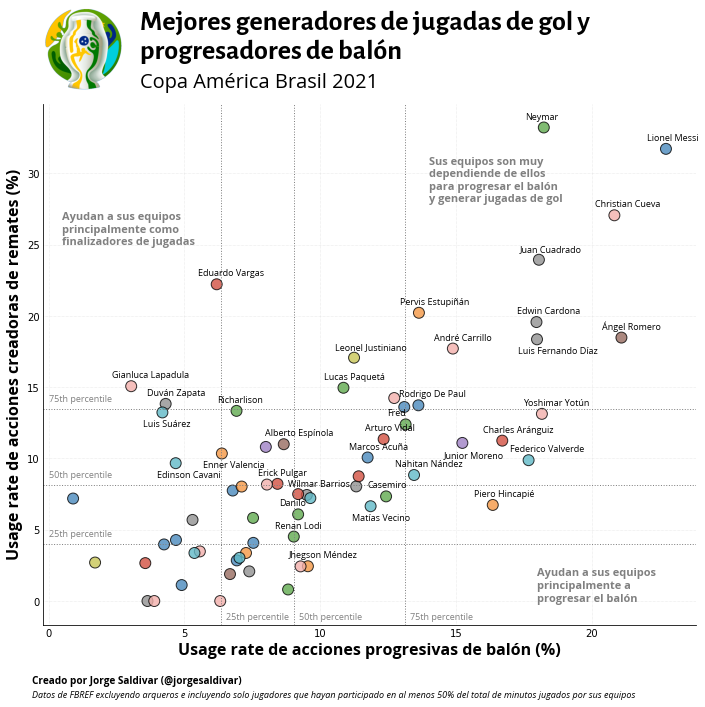

In [58]:
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "black"
background = "white"
filler = "grey"
primary = "blue"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)

x = analysis_df['progressive_actions_usage_rate'].values
y = analysis_df['sca_usage_rate'].values


colors = {'argentina':'#4A8ABD', 'bolivia':'#C8C656', 'brazil':'#61AA4F', 'colombia':'#919191' , 
          'chile':'#D25041', 'ecuador': '#F49845', 'paraguay': '#976C60', 'peru': '#F3B0AB', 'uruguay': '#60B9C7',
          'venezuela': '#9F81C5'}

ax.scatter(x, y, s=120, color=analysis_df['country'].map(colors), alpha=0.8, lw=1, zorder=2, edgecolor='black')
# add horizontal lines
ax.axhline(y=analysis_df['sca_usage_rate'].describe()['25%'], color='gray', linestyle='dotted', lw=1)
ax.axhline(y=analysis_df['sca_usage_rate'].describe()['50%'], color='gray', linestyle='dotted', lw=1)
ax.axhline(y=analysis_df['sca_usage_rate'].describe()['75%'], color='gray', linestyle='dotted', lw=1)
# add vertical lines
ax.axvline(x=analysis_df['progressive_actions_usage_rate'].describe()['25%'], color='gray', linestyle='dotted', lw=1)
ax.axvline(x=analysis_df['progressive_actions_usage_rate'].describe()['50%'], color='gray', linestyle='dotted', lw=1)
ax.axvline(x=analysis_df['progressive_actions_usage_rate'].describe()['75%'], color='gray', linestyle='dotted', lw=1)

#sns.stripplot(x, y, jitter=0.1, size=10)

fig.text(0.2,1.06,"Mejores generadores de jugadas de gol y\nprogresadores de balón",fontweight="bold", fontsize=28,fontfamily=title_font, 
         color=text_color)
fig.text(0.2,1.01,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, color=text_color)

ax.set_xlabel("Usage rate de acciones progresivas de balón (%)", fontfamily=body_font, fontweight="bold", fontsize=16, 
              color=text_color)
ax.set_ylabel("Usage rate de acciones creadoras de remates (%)", fontfamily=body_font, fontweight="bold", fontsize= 16, 
              color=text_color)

ax.tick_params(axis="both",length=0)


spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

# add percentiles annotations
ax.annotate('25th percentile', (0, analysis_df['sca_usage_rate'].describe()['25%']+0.5), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('50th percentile', (0, analysis_df['sca_usage_rate'].describe()['50%']+0.5), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('75th percentile', (0, analysis_df['sca_usage_rate'].describe()['75%']+0.5), fontfamily=body_font, 
            fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('25th percentile', (analysis_df['progressive_actions_usage_rate'].describe()['25%']+0.2, -1.3), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('50th percentile', (analysis_df['progressive_actions_usage_rate'].describe()['50%']+0.2, -1.3), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)
ax.annotate('75th percentile', (analysis_df['progressive_actions_usage_rate'].describe()['75%']+0.2, -1.3), 
            fontfamily=body_font, fontweight="regular", fontsize=9, color='gray', zorder=3)
# add players' names
for i, txt in enumerate(analysis_df['player']):
    delta_x = -0.7
    delta_y = 0.6
    # Some players' names need to be removed to create space for their neightborgs (nothing against these guys ;)
    if txt in ['Giovani Lo Celso', 'Luis Mago', 'William Tesillo', 'Matías Viña', 'Mauricio Isla', 
               'Eugenio Mena', 'Miguel Trauco', 'Renato Tapia', 'Sergio Peña']:
        continue
    # In some cases put the name behind the dot
    if txt in ['Luis Suárez', 'Luis Fernando Díaz', 'Junior Moreno', 'Matías Vecino', 'Edinson Cavani', 
               'Enner Valencia']:
        delta_y = -1
    if x[i] >= analysis_df['progressive_actions_usage_rate'].describe()['50%'] or \
       y[i] >= analysis_df['sca_usage_rate'].describe()['50%']:
        ax.annotate(txt, (x[i]+delta_x, y[i]+delta_y), fontfamily=body_font, fontweight="regular", fontsize=9, color=text_color, 
                    zorder=3)
# add understanding info
ax.annotate('Ayudan a sus equipos\nprincipalmente como\nfinalizadores de jugadas',(0.5, 25), fontfamily=body_font, 
            fontweight="bold", fontsize=11, color='gray', zorder=3)
ax.annotate('Sus equipos son muy\ndependiende de ellos\npara progresar el balón\ny generar jugadas de gol',
            (14, 28), fontfamily=body_font, fontweight="bold", fontsize=11, color='gray', zorder=3)
ax.annotate('Ayudan a sus equipos\nprincipalmente a\nprogresar el balón',
            (18, 0), fontfamily=body_font, fontweight="bold", fontsize=11, color='gray', zorder=3)

ax2 = fig.add_axes([0.02,1,0.20,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)
        
        
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.025, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF excluyendo arqueros e incluyendo solo jugadores que hayan participado en al menos 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.05, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.savefig("outputs/progessive_creative_load.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()

## 4. Analysis: *Player comparison*

This analysis is inspired in [@NinadB_06](https://twitter.com/NinadB_06) who published his analysis [here](https://twitter.com/NinadB_06/status/1474293035714465801). It includes the `progressive actions` (i.e., `progressive passes` combined with `progressive carries`), `pressure`, and `npxG + xA`.

### Load data

Load `standard` dataset

In [59]:
standard_df = pd.DataFrame()
for country in countries:
    if standard_df.size > 0:
        aux_standard_df = pd.read_csv(f"data/{country}_standard.csv")
        aux_standard_df['country'] = country
        standard_df = standard_df.append(aux_standard_df, ignore_index=True, sort=False)
    else:
        standard_df = pd.read_csv(f"data/{country}_standard.csv")
        standard_df['country'] = country

Load `defensive` dataset

In [61]:
defensive_df = pd.DataFrame()
for country in countries:
    if defensive_df.size > 0:
        aux_defensive_df = pd.read_csv(f"data/{country}_defensive_actions.csv")
        aux_defensive_df['country'] = country
        defensive_df = defensive_df.append(aux_defensive_df, ignore_index=True, sort=False)
    else:
        defensive_df = pd.read_csv(f"data/{country}_defensive_actions.csv")
        defensive_df['country'] = country

Load `possession` dataset

In [62]:
possession_df = pd.DataFrame()
for country in countries:
    if possession_df.size > 0:
        aux_possession_df = pd.read_csv(f"data/{country}_possession.csv")
        aux_possession_df['country'] = country
        possession_df = possession_df.append(aux_possession_df, ignore_index=True, sort=False)
    else:
        possession_df = pd.read_csv(f"data/{country}_possession.csv")
        possession_df['country'] = country

Load `passes` dataset

In [68]:
passes_df = pd.DataFrame()
for country in countries:
    if passes_df.size > 0:
        aux_passes_df = pd.read_csv(f"data/{country}_passing.csv")
        aux_passes_df['country'] = country
        passes_df = passes_df.append(aux_passes_df, ignore_index=True, sort=False)
    else:
        passes_df = pd.read_csv(f"data/{country}_passing.csv")
        passes_df['country'] = country

### Check datasets

**Standard**

In [63]:
standard_df.head()

,player,pos,age,playingtime_mp,playingtime_starts,playingtime_min,playingtime_90s,performance_gls,performance_ast,performance_g-pk,performance_pk,performance_pkatt,performance_crdy,performance_crdr,per90minutes_gls,per90minutes_ast,per90minutes_g+a,per90minutes_g-pk,per90minutes_g+a-pk,expected_xg,expected_npxg,expected_xa,expected_npxg+xa,per90minutes_xg,per90minutes_xa,per90minutes_xg+xa,per90minutes_npxg,per90minutes_npxg+xa,matches,country
0,Lionel Messi,"FW,MF",33.0,7,7,660.0,7.3,4.0,5.0,3.0,1.0,1.0,0.0,0.0,0.55,0.68,1.23,0.41,1.09,2.8,2.0,2.9,4.9,0.38,0.40,0.78,0.27,0.67,Matches,argentina
1,Emiliano Martínez,GK,28.0,6,6,570.0,6.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,argentina
2,Rodrigo De Paul,MF,26.0,6,5,498.0,5.5,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.18,0.18,0.36,0.18,0.36,1.0,1.0,0.8,1.8,0.17,0.15,0.32,0.17,0.32,Matches,argentina
3,Nicolás Otamendi,DF,32.0,5,5,480.0,5.3,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,argentina
4,Lautaro Martínez,FW,23.0,6,5,445.0,4.9,3.0,0.0,3.0,0.0,0.0,1.0,0.0,0.61,0.00,0.61,0.61,0.61,4.5,4.5,0.0,4.6,0.92,0.01,0.92,0.92,0.92,Matches,argentina


In [64]:
standard_df.shape

(292, 30)

**Defensive**

In [65]:
defensive_df.head()

,player,pos,age,90s,tackles_tkl,tackles_tklw,tackles_def 3rd,tackles_mid 3rd,tackles_att 3rd,vsdribbles_tkl,vsdribbles_att,vsdribbles_tkl%,vsdribbles_past,pressures_press,pressures_succ,pressures_%,pressures_def 3rd,pressures_mid 3rd,pressures_att 3rd,blocks_blocks,blocks_sh,blocks_shsv,blocks_pass,int,tkl+int,clr,err,matches,country
0,Lionel Messi,"FW,MF",33.0,7.3,8,6,1,4,3,3,9,33.3,6,93,27,29.0,13,37,43,3,1,0,2,3,11,0,0,Matches,argentina
1,Emiliano Martínez,GK,28.0,6.3,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,Matches,argentina
2,Rodrigo De Paul,MF,26.0,5.5,11,10,7,2,2,5,8,62.5,3,87,30,34.5,37,29,21,8,0,0,8,8,19,5,0,Matches,argentina
3,Nicolás Otamendi,DF,32.0,5.3,9,5,7,2,0,4,7,57.1,3,49,20,40.8,32,17,0,9,2,0,7,5,14,34,1,Matches,argentina
4,Lautaro Martínez,FW,23.0,4.9,5,3,1,2,2,3,6,50.0,3,88,15,17.0,3,41,44,5,1,0,4,5,10,5,0,Matches,argentina


In [66]:
defensive_df.shape

(253, 29)

**Possession**

In [67]:
possession_df.head()

,player,pos,age,90s,touches_touches,touches_def pen,touches_def 3rd,touches_mid 3rd,touches_att 3rd,touches_att pen,touches_live,dribbles_succ,dribbles_att,dribbles_succ%,dribbles_#pl,dribbles_megs,carries_carries,carries_totdist,carries_prgdist,carries_prog,carries_1/3,carries_cpa,carries_mis,carries_dis,receiving_targ,receiving_rec,receiving_rec%,receiving_prog,matches,country
0,Lionel Messi,"FW,MF",33.0,7.3,432,1,27,193,254,36,389,33,47,70.2,36,0,354,2085,1306,71,25,12,13,27,378,321,84.9,32,Matches,argentina
1,Emiliano Martínez,GK,28.0,6.3,171,156,171,0,0,0,122,0,0,NaN,0,0,92,477,290,0,0,0,0,0,68,68,100.0,0,Matches,argentina
2,Rodrigo De Paul,MF,26.0,5.5,305,3,75,140,119,7,281,3,10,30.0,5,0,224,1265,670,29,10,1,3,7,226,202,89.4,13,Matches,argentina
3,Nicolás Otamendi,DF,32.0,5.3,258,43,144,130,6,3,242,0,0,NaN,0,0,150,1158,777,16,2,0,1,0,164,163,99.4,1,Matches,argentina
4,Lautaro Martínez,FW,23.0,4.9,129,7,18,54,61,20,123,8,9,88.9,9,1,76,185,85,3,0,1,10,11,135,75,55.6,19,Matches,argentina


In [69]:
possession_df.shape

(253, 30)

**Passing**

In [70]:
passing_df.head()

,player,pos,age,90s,total_cmp,total_att,total_cmp%,total_totdist,total_prgdist,short_cmp,short_att,short_cmp%,medium_cmp,medium_att,medium_cmp%,long_cmp,long_att,long_cmp%,ast,xa,a-xa,kp,1/3,ppa,crspa,prog,matches,country
0,Lionel Messi,"FW,MF",33.0,7.3,249,323,77.1,4417,1525,117,139,84.2,88,107,82.2,33,51,64.7,5,2.9,2.1,22,31,11,1,42,Matches,argentina
1,Emiliano Martínez,GK,28.0,6.3,111,163,68.1,3741,2449,15,15,100.0,54,55,98.2,41,91,45.1,0,0.0,0.0,0,5,0,0,0,Matches,argentina
2,Rodrigo De Paul,MF,26.0,5.5,211,247,85.4,4157,999,87,100,87.0,83,93,89.2,34,44,77.3,1,0.8,0.2,8,18,5,0,22,Matches,argentina
3,Nicolás Otamendi,DF,32.0,5.3,175,199,87.9,3621,1098,53,61,86.9,96,105,91.4,26,31,83.9,0,0.0,0.0,1,13,0,0,9,Matches,argentina
4,Lautaro Martínez,FW,23.0,4.9,41,57,71.9,555,22,25,27,92.6,12,19,63.2,2,6,33.3,0,0.0,0.0,1,2,0,0,0,Matches,argentina


In [71]:
passing_df.shape

(243, 28)

### Process datasets

In [72]:
passing_df = passing_df[passing_df['player'] != 'Opponent Total']

In [73]:
possession_df = possession_df[possession_df['player'] != 'Opponent Total']

In [74]:
standard_df = standard_df[standard_df['player']!='Opponent Total']

In [75]:
defensive_df = defensive_df[defensive_df['player']!='Opponent Total']

### Create dataset for analysis

In [86]:
analysis_df = pd.merge(passing_df[['player','country', 'pos', '90s','prog']], possession_df[['player', 'country', 'pos', 'carries_prog']], on=['player', 'country', 'pos'])

In [87]:
analysis_df = pd.merge(analysis_df, standard_df[['player', 'country', 'pos', 'expected_npxg+xa']], on=['player', 'country', 'pos'])

In [88]:
analysis_df = pd.merge(analysis_df, defensive_df[['player', 'country', 'pos', 'pressures_press']], on=['player', 'country', 'pos'])

In [89]:
analysis_df.head()

,player,country,pos,90s,prog,carries_prog,expected_npxg+xa,pressures_press
0,Lionel Messi,argentina,"FW,MF",7.3,42,71,4.9,93
1,Emiliano Martínez,argentina,GK,6.3,0,0,0.0,0
2,Rodrigo De Paul,argentina,MF,5.5,22,29,1.8,87
3,Nicolás Otamendi,argentina,DF,5.3,9,16,0.0,49
4,Lautaro Martínez,argentina,FW,4.9,0,3,4.6,88


In [90]:
print(f"The analysis dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The analysis dataset contains 243 rows and 8 columns


**Compute metrics**

In [91]:
analysis_df['progressive_actions'] = analysis_df['prog'] + analysis_df['carries_prog']
analysis_df['progressive_actions/90s'] = analysis_df['progressive_actions']/analysis_df['90s']
analysis_df['pressure/90s'] = analysis_df['pressures_press']/analysis_df['90s']
analysis_df['npxg+xa/90s'] = analysis_df['expected_npxg+xa']/analysis_df['90s']

In [92]:
analysis_df.head()

,player,country,pos,90s,prog,carries_prog,expected_npxg+xa,pressures_press,progressive_actions,progressive_actions/90s,pressure/90s,npxg+xa/90s
0,Lionel Messi,argentina,"FW,MF",7.3,42,71,4.9,93,113,15.479452,12.739726,0.671233
1,Emiliano Martínez,argentina,GK,6.3,0,0,0.0,0,0,0.000000,0.000000,0.000000
2,Rodrigo De Paul,argentina,MF,5.5,22,29,1.8,87,51,9.272727,15.818182,0.327273
3,Nicolás Otamendi,argentina,DF,5.3,9,16,0.0,49,25,4.716981,9.245283,0.000000
4,Lautaro Martínez,argentina,FW,4.9,0,3,4.6,88,3,0.612245,17.959184,0.938776


### Filter data

Remove players who play less than 50% of the team's played minutes

In [93]:
total_min_team_played = analysis_df.loc[analysis_df['player']=='Squad Total','90s'].values[0]
analysis_df = analysis_df[analysis_df['90s'] >= (total_min_team_played/2)]

Remove total row

In [94]:
analysis_df = analysis_df[analysis_df['player'] != 'Squad Total']

Remove GKs

In [95]:
analysis_df = analysis_df[analysis_df['pos'] != 'GK']

In [96]:
print(f"The final dataset contains {analysis_df.shape[0]} players")

The final dataset contains 67 players


### Some stats

**Top-5 with most progressive actions per 90**

In [229]:
analysis_df.sort_values(by='progressive_actions/90s', ascending=False).head()

,player,country,pos,90s,prog,carries_prog,expected_npxg+xa,pressures_press,progressive_actions,progressive_actions/90s,pressure/90s,npxg+xa/90s
199,Federico Valverde,uruguay,MF,4.6,33,41,1.4,80,74,16.086957,17.391304,0.304348
150,Ángel Romero,paraguay,"MF,FW",4.6,20,54,2.8,76,74,16.086957,16.521739,0.608696
54,Neymar,brazil,FW,6.0,36,57,7.5,77,93,15.500000,12.833333,1.250000
0,Lionel Messi,argentina,"FW,MF",7.3,42,71,4.9,93,113,15.479452,12.739726,0.671233
175,Christian Cueva,peru,"FW,MF",6.6,30,51,2.0,144,81,12.272727,21.818182,0.303030


**Top-5 with most pressures per 90**

In [228]:
analysis_df.sort_values(by='pressure/90s', ascending=False).head()

,player,country,pos,90s,prog,carries_prog,expected_npxg+xa,pressures_press,progressive_actions,progressive_actions/90s,pressure/90s,npxg+xa/90s
172,Yoshimar Yotún,peru,MF,7.1,43,33,2.7,208,76,10.704225,29.295775,0.380282
55,Fred,brazil,MF,5.1,32,25,0.3,135,57,11.176471,26.470588,0.058824
104,Charles Aránguiz,chile,MF,5.0,24,36,0.5,128,60,12.000000,25.600000,0.100000
107,Arturo Vidal,chile,MF,4.4,22,17,0.6,111,39,8.863636,25.227273,0.136364
28,Leonel Justiniano,bolivia,MF,3.8,11,14,0.2,91,25,6.578947,23.947368,0.052632


**Top-5 with npxG+xA per 90**

In [230]:
analysis_df.sort_values(by='npxg+xa/90s', ascending=False).head()

,player,country,pos,90s,prog,carries_prog,expected_npxg+xa,pressures_press,progressive_actions,progressive_actions/90s,pressure/90s,npxg+xa/90s
54,Neymar,brazil,FW,6.0,36,57,7.5,77,93,15.500000,12.833333,1.250000
4,Lautaro Martínez,argentina,FW,4.9,0,3,4.6,88,3,0.612245,17.959184,0.938776
57,Richarlison,brazil,"FW,MF",5.1,6,24,3.5,83,30,5.882353,16.274510,0.686275
0,Lionel Messi,argentina,"FW,MF",7.3,42,71,4.9,93,113,15.479452,12.739726,0.671233
150,Ángel Romero,paraguay,"MF,FW",4.6,20,54,2.8,76,74,16.086957,16.521739,0.608696


### Draw scatterplots

/var/folders/kr/kf9llw3x04sg34ns7_9hgt4m0000gn/T/ipykernel_30288/839359874.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


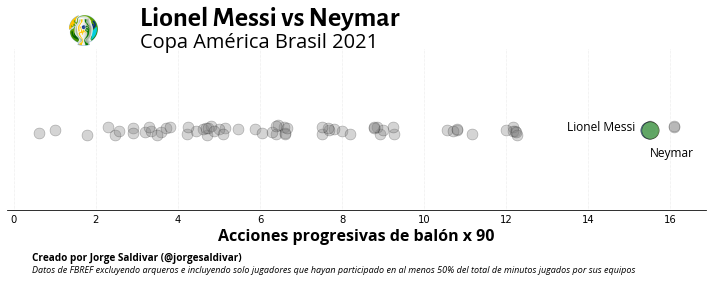

In [176]:
player_1 = 'Lionel Messi'
player_2 = 'Neymar'
color_player_1 = '#4A8ABD'
color_player_2 = '#61AA4F'

title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "black"
background = "white"
filler = "grey"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = background
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

fig, ax = plt.subplots(figsize=(10,3))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)

x = analysis_df['progressive_actions/90s'].values
y = np.repeat(0, analysis_df.shape[0])
x_player_1 = analysis_df[analysis_df['player']==player_1]['progressive_actions/90s'].values[0]
x_player_2 = analysis_df[analysis_df['player']==player_2]['progressive_actions/90s'].values[0]

sns.regplot(x, y, fit_reg = False, y_jitter = 0.2, 
            scatter_kws = {'alpha' : 1/3, 'edgecolor': 'black', 'linewidth': 0.5, 's': 120}, 
            color=filler)

# draw player 1 stats
ax.scatter(x_player_1, 0, s=300, color=color_player_1, edgecolors='black', alpha=0.8, lw=0.5, zorder=3)
# draw player 2 stats
ax.scatter(x_player_2, 0, s=300, color=color_player_2, edgecolors='black', alpha=0.8, lw=0.5, zorder=3)

fig.text(0.2,1.06,f"{player_1} vs {player_2}",fontweight="bold", fontsize=28,fontfamily=title_font, color=text_color)
fig.text(0.2,0.96,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, color=text_color)

ax.set_xlabel("Acciones progresivas de balón x 90", fontfamily=body_font, fontweight="bold", fontsize=16, 
              color=text_color)

ax.tick_params(axis="both",length=0)
ax.axes.get_yaxis().set_visible(False)
ax.set_ylim([-3,3])

spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right","left"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

# add annotations
ax.annotate(player_1, (x_player_1-2, 0), fontfamily=body_font, fontweight="regular", fontsize=12, color=text_color)
ax.annotate(player_2, (x_player_2, -1), fontfamily=body_font, fontweight="regular", fontsize=12, color=text_color)

ax2 = fig.add_axes([0.02,0.96,0.20,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)
        
        
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.025, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF excluyendo arqueros e incluyendo solo jugadores que hayan participado en al menos 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.08, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.savefig("outputs/messi_ney_progressive.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()

/var/folders/kr/kf9llw3x04sg34ns7_9hgt4m0000gn/T/ipykernel_30288/1006430720.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


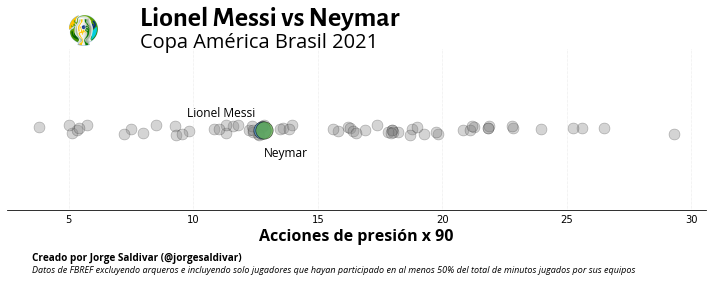

In [177]:
player_1 = 'Lionel Messi'
player_2 = 'Neymar'
color_player_1 = '#4A8ABD'
color_player_2 = '#61AA4F'

title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "black"
background = "white"
filler = "grey"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = background
mpl.rcParams['xtick.labelsize'] = 10

fig, ax = plt.subplots(figsize=(10,3))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)

x = analysis_df['pressure/90s'].values
y = np.repeat(0, analysis_df.shape[0])
x_player_1 = analysis_df[analysis_df['player']==player_1]['pressure/90s'].values[0]
x_player_2 = analysis_df[analysis_df['player']==player_2]['pressure/90s'].values[0]

#ax.scatter(x, y, s=120, color=filler, edgecolors='black', alpha=0.4, lw=0.5, zorder=1)
sns.regplot(x, y, fit_reg = False, y_jitter = 0.2, 
            scatter_kws = {'alpha' : 1/3, 'edgecolor': 'black', 'linewidth': 0.5, 's': 120}, 
            color=filler)

# draw player 1 stats
ax.scatter(x_player_1, 0, s=300, color=color_player_1, edgecolors='black', alpha=0.8, lw=0.5, zorder=2)
# draw player 2 stats
ax.scatter(x_player_2, 0, s=300, color=color_player_2, edgecolors='black', alpha=0.8, lw=0.5, zorder=2)

fig.text(0.2,1.06,f"{player_1} vs {player_2}",fontweight="bold", fontsize=28,fontfamily=title_font, color=text_color)
fig.text(0.2,0.96,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, color=text_color)

ax.set_xlabel("Acciones de presión x 90", fontfamily=body_font, fontweight="bold", fontsize=16, 
              color=text_color)

ax.tick_params(axis="both",length=0)
ax.axes.get_yaxis().set_visible(False)
ax.set_ylim([-3,3])

spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right","left"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

# add annotations
ax.annotate(player_1, (x_player_1-3, 0.5), fontfamily=body_font, fontweight="regular", fontsize=12, color=text_color)
ax.annotate(player_2, (x_player_2, -1), fontfamily=body_font, fontweight="regular", fontsize=12, color=text_color)

ax2 = fig.add_axes([0.02,0.96,0.20,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)
        
        
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.025, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF excluyendo arqueros e incluyendo solo jugadores que hayan participado en al menos 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.08, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.savefig("outputs/messi_ney_pressures.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()

/var/folders/kr/kf9llw3x04sg34ns7_9hgt4m0000gn/T/ipykernel_30288/1688026823.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


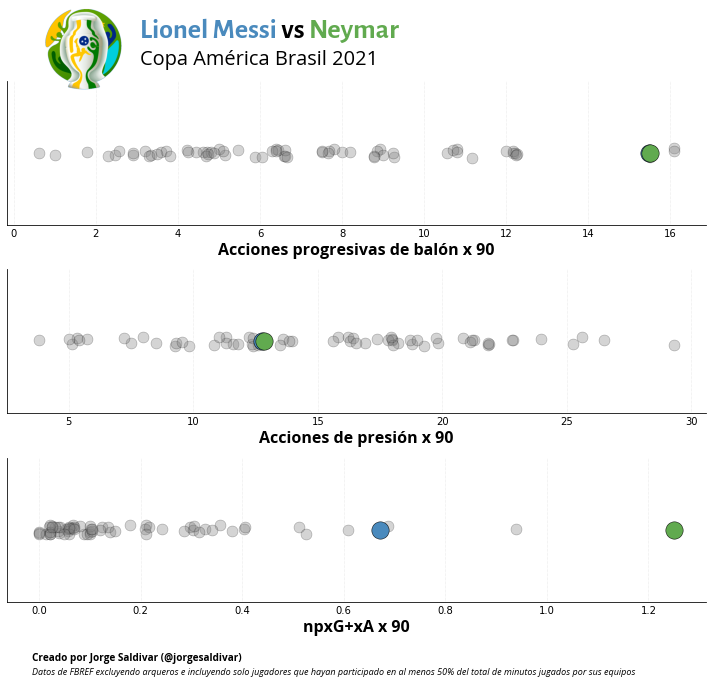

In [234]:
player_1 = 'Lionel Messi'
player_2 = 'Neymar'
color_player_1 = '#4A8ABD'
color_player_2 = '#61AA4F'

title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "black"
background = "white"
filler = "grey"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = background
mpl.rcParams['xtick.labelsize'] = 10

fig, axs = plt.subplots(3,figsize=(10,8))
fig.set_facecolor(background)


x_vars = [
    {'label': 'Acciones progresivas de balón x 90','name': 'progressive_actions/90s'},
    {'label': 'Acciones de presión x 90','name': 'pressure/90s'},
    {'label': 'npxG+xA x 90', 'name': 'npxg+xa/90s'}
]
for i, var in enumerate(x_vars):
    # set figure's params
    axs[i].patch.set_alpha(0)
    axs[i].grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)
    axs[i].tick_params(axis="both",length=0)
    axs[i].axes.get_yaxis().set_visible(False)
    axs[i].set_ylim([-3,3])
    spines = ["top","right","bottom"]
    for s in spines:
        if s in ["top","right","left"]:
            axs[i].spines[s].set_visible(False)
        else:
            axs[i].spines[s].set_color(text_color)

    # draw all players
    x = analysis_df[var['name']].values
    y = np.repeat(0, analysis_df.shape[0])
    sns.regplot(ax=axs[i], x=x, y=y, fit_reg = False, y_jitter = 0.2, 
                scatter_kws = {'alpha' : 1/3, 'edgecolor': 'black', 'linewidth': 0.5, 's': 120}, 
                color=filler)
    # draw player 1 stats
    x_player_1 = analysis_df[analysis_df['player']==player_1][var['name']].values[0]
    axs[i].scatter(x_player_1, 0, s=300, color=color_player_1, edgecolors='black', lw=0.5, zorder=2)
    # draw player 2 stats
    x_player_2 = analysis_df[analysis_df['player']==player_2][var['name']].values[0]
    axs[i].scatter(x_player_2, 0, s=300, color=color_player_2, edgecolors='black', lw=0.5, zorder=2)
    
    # add annotations
    #axs[i].annotate(player_1, (x_player_1, 0.5), fontfamily=body_font, fontweight="regular", fontsize=12, 
    #                color=text_color)
    #axs[i].annotate(player_2, (x_player_2, -1), fontfamily=body_font, fontweight="regular", fontsize=12, 
    #                color=text_color)
    axs[i].set_xlabel(f"{var['label']}", fontfamily=body_font, fontweight="bold", fontsize=16, 
                     color=text_color)

## add title
htext.fig_text(s=f"<{player_1}> vs <{player_2}>", x=0.2, y=1.09, 
               highlight_textprops=[{"color": color_player_1},{"color": color_player_2}],
               fontweight="bold", fontsize=28, 
               fontfamily=title_font, color=text_color)

fig.text(0.2,1.01,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, color=text_color)

## add logo
ax2 = fig.add_axes([0.02,0.96,0.20,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)

## add footer
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.025, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF excluyendo arqueros e incluyendo solo jugadores que hayan participado en al menos 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.05, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

## save figure
file_name = f"{player_1.replace(' ', '-').lower()}_vs_{player_2.replace(' ', '-').lower()}"
plt.savefig(f"outputs/{file_name}.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()

NameError: name 'analysis_df' is not defined

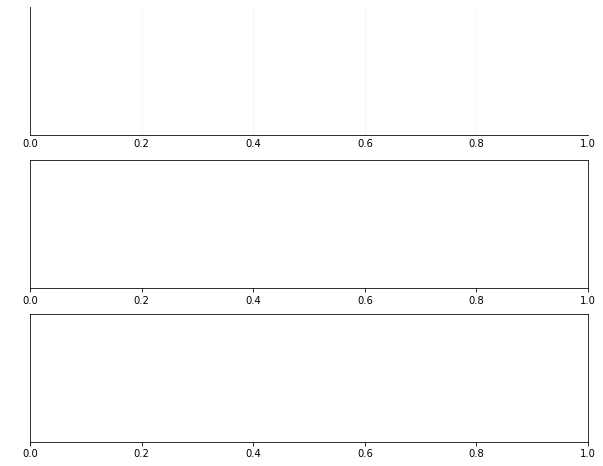

In [2]:
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "black"
background = "white"
filler = "grey"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = background
mpl.rcParams['xtick.labelsize'] = 10

fig, axs = plt.subplots(3,figsize=(10,8))
fig.set_facecolor(background)

colors = {'argentina':'#4A8ABD', 'bolivia':'#C8C656', 'brazil':'#61AA4F', 'colombia':'#919191' , 
          'chile':'#D25041', 'ecuador': '#F49845', 'paraguay': '#976C60', 'peru': '#F3B0AB', 'uruguay': '#60B9C7',
          'venezuela': '#9F81C5'}

x_vars = [
    {'label': 'Acciones progresivas de balón x 90','name': 'progressive_actions/90s'},
    {'label': 'Acciones de presión x 90','name': 'pressure/90s'},
    {'label': 'npxG+xA x 90', 'name': 'npxg+xa/90s'}
]
for i, var in enumerate(x_vars):
    # set figure's params
    axs[i].patch.set_alpha(0)
    axs[i].grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)
    axs[i].tick_params(axis="both",length=0)
    axs[i].axes.get_yaxis().set_visible(False)
    axs[i].set_ylim([-3,3])
    spines = ["top","right","bottom"]
    for s in spines:
        if s in ["top","right","left"]:
            axs[i].spines[s].set_visible(False)
        else:
            axs[i].spines[s].set_color(text_color)

    # draw all players
    x = analysis_df[var['name']].values
    y = np.repeat(0, analysis_df.shape[0])
    sns.regplot(ax=axs[i], x=x, y=y, fit_reg = False, y_jitter = 0.2, 
                scatter_kws = {'alpha' : 1/3, 'edgecolor': 'black', 'linewidth': 0.5, 's': 120}, 
                color=filler)
    # draw top-5
    top5_df = analysis_df.sort_values(by=var['name'], ascending=False).head()
    for y in range(0, 5):
        player_name = top5_df.iloc[y]['player']
        f_player_name = player_name
        if ' ' in player_name:
            f_player_name = f"{player_name[0]}. {player_name.split(' ')[1]}"
        player_country = top5_df.iloc[y]['country']
        x_player = analysis_df[analysis_df['player']==player_name][var['name']].values[0]
        axs[i].scatter(x_player, 0, s=300, color=colors[player_country], alpha=0.9, edgecolors='black', lw=0.5, 
                       zorder=2)
        # add annotations
        ann_x = x_player
        ann_y = 0
        if var['name'] == 'npxg+xa/90s':
            if y == 0 :
                ann_x = x_player
                ann_y = 0.5
            elif y == 1 or y ==3:
                ann_x = x_player
                ann_y = -1
            elif y == 2:
                ann_x = x_player
                ann_y = 0.5                   
            elif y == 4:
                ann_x = x_player - 0.1
                ann_y = 0.5
        elif var['name'] == 'pressure/90s':
            if y == 0:
                ann_x = x_player
                ann_y = 0.5
            elif y == 1:
                ann_x = x_player
                ann_y = -1
            elif y == 2:
                ann_x -= 0.5
                ann_y = 0.5
            elif y == 3:
                ann_x -= 1.5
                ann_y = -1
            elif y == 4:
                ann_x -= 2.5
                ann_y = 0.5
        elif var['name'] == 'progressive_actions/90s':
            if y == 0:
                ann_x = x_player
                ann_y = 0.5
            elif y == 1:
                ann_x = x_player
                ann_y = -1
            elif y == 2:
                ann_x = x_player-0.8
                ann_y = 0.5
            elif y == 3:
                ann_x = x_player-0.8
                ann_y = -1
            elif y == 4:
                ann_x = x_player
                ann_y = 0.5
        axs[i].annotate(f_player_name, (ann_x, ann_y), fontfamily=body_font, fontweight="regular", fontsize=12, 
                        color=text_color)
    axs[i].set_xlabel(f"{var['label']}", fontfamily=body_font, fontweight="bold", fontsize=16, 
                     color=text_color)

## add title
fig.text(0.2,1.06,"Mejores 5 por contribuciones en defensa y ataque",fontweight="bold", fontsize=28,fontfamily=title_font, color=text_color)
fig.text(0.2,1.01,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, color=text_color)

## add logo
ax2 = fig.add_axes([0.02,0.96,0.20,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)

## add footer
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.025, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF excluyendo arqueros e incluyendo solo jugadores que hayan participado en al menos 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.05, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

## save figure
plt.savefig(f"outputs/top5.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()